## Implementing RandomSearchCV with Scikit-Learn

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random

x,y = make_classification(n_samples=4400, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

In [19]:
def Split_in_three_groups(x_train):
    group=np.split((range(0, len(x_train))), [int(.33*len(x_train)), int(.67*len(x_train))])
    return group
def RandomSearchCV(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in params:
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            group_1=list(Split_in_three_groups(x_train)[0])
            group_2=list(Split_in_three_groups(x_train)[1])
            group_3=list(Split_in_three_groups(x_train)[2])
            
            if j==0:
                
                group_1.extend(group_2)
                Training_1=group_1
                Test_1=group_3
                
                X_train = x_train[Training_1]
                Y_train = y_train[Training_1]
                X_test  = x_train[Test_1]
                Y_test  = y_train[Test_1]
                classifier.n_neighbors = k
                classifier.fit(X_train,Y_train)
                Y_predicted = classifier.predict(X_test)
                
               
                testscores_folds.append(accuracy_score(Y_test, Y_predicted))
                Y_predicted = classifier.predict(X_train)
                trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
                
                
            elif j==1:
                group_1.extend(group_3)
                Training_1=group_1
                Test_1=group_2
                
                X_train = x_train[Training_1]
                Y_train = y_train[Training_1]
                X_test  = x_train[Test_1]
                Y_test  = y_train[Test_1]
                classifier.n_neighbors = k
                classifier.fit(X_train,Y_train)
                Y_predicted = classifier.predict(X_test)
                testscores_folds.append(accuracy_score(Y_test, Y_predicted))
                Y_predicted = classifier.predict(X_train)
                trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
                
            elif j==2:
                group_2.extend(group_3)
                Training_1=group_2
                Test_1=group_1
                
                X_train = x_train[Training_1]
                Y_train = y_train[Training_1]
                X_test  = x_train[Test_1]
                Y_test  = y_train[Test_1]
                classifier.n_neighbors = k
                classifier.fit(X_train,Y_train)
                Y_predicted = classifier.predict(X_test)
                testscores_folds.append(accuracy_score(Y_test, Y_predicted))
                Y_predicted = classifier.predict(X_train)
                trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
                
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores
    


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import random


neigh = KNeighborsClassifier()

numbers=[]
for i in range(10): 
    numbers.append(random.randint(0, 50))
    c=sorted(numbers)
    params=tuple(c)
print(params)    

folds = 3


trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)

print(trainscores)
print(testscores)
    



(6, 9, 10, 17, 37, 45, 45, 47, 48, 48)
[0.9198680609806797, 0.9143949673121994, 0.9157609564665196, 0.9122728871711233, 0.9093924317804915, 0.9072657831138157, 0.9072657831138157, 0.907416544458607, 0.9080218741005716, 0.9080218741005716]
[0.9030591116152613, 0.9094060029888907, 0.9090909090909091, 0.9084697239777455, 0.9075964637461963, 0.9067322061974469, 0.9067322061974469, 0.9058319379174994, 0.9061470318154811, 0.9061470318154811]


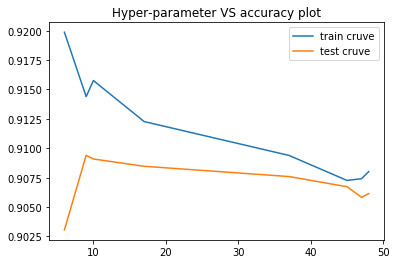

In [22]:
import matplotlib.pyplot as plt
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [23]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

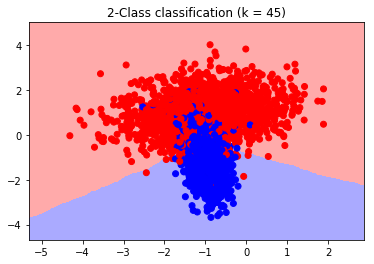

In [24]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)